# 한글 텍스트 전처리

In [35]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.6.0'

### 필요한 모듈 임포트

In [9]:
import kss
import pandas as pd
from tqdm import tqdm
from kss import split_sentences
from konlpy.tag import komoran

ImportError: cannot import name 'komoran' from 'konlpy.tag' (c:\Users\PlayData\anaconda3\envs\tf2\lib\site-packages\konlpy\tag\__init__.py)

###  한국어 말뭉치

In [19]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [20]:
c = kolaw.open('constitution.txt').read()
c

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

###  문장 분리

In [38]:
# 1. 정규식을 사용하여 분리
import re 

# 정규식으로 문장부호 기준 문장 분리하는 간단한 함수 정의
def simple_splitter(text):
    sentences = re.split('[.!?]', text)
    return sentences

sentences = simple_splitter(c)
print(sentences[:5])

simple_splitter('어제는 추웠다. 오늘도 춥다. 내일도 추울까?')

['대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다', '\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다', '\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다', '\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다', '\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다']


['어제는 추웠다', ' 오늘도 춥다', ' 내일도 추울까', '']

In [39]:
# 2. kss split_sentences 활용 문장 분리
from kss import split_sentences
split_sentences()

TypeError: split_sentences() missing 1 required positional argument: 'text'

### 형태소 분석(tagging)
- POS: Part of Speech, 품사
- 형태소: 의미를 갖는 최소단위
- 텍스트를 형태소 단위로 쪼개어 품사를 태깅한 후, 원하는 품사만을 선택하기 위해 수행

In [ ]:
## 형태소 분석기 비교

In [6]:
import os
print('JAVA_HOME' in os.environ)

True


In [5]:
os.environ['JAVA_HOME'] = r'C:\Program Files\Java\jdk-19\bin\server'

In [7]:
from konlpy.tag import *

han1 = Hannanum()
kkma = Kkma()
komoran = Komoran()
# mecab = Mecab()
okt = Okt()

이 클래스들은 다음과 같은 메서드를 공통적으로 제공한다.

nouns : 명사 추출

morphs : 형태소 추출

pos : 품사 부착

In [43]:
sample_sentence = c[:40]
sample_sentence

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로'

In [44]:
# morphs() method는 형태소 단위로 텍스트를 분리해줌
# komoran은 빈줄이 있으면 에러가 남
kkma.nouns(sample_sentence)

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [45]:
# pos() method는 형태소 분리후, 형태소에 품사를 태그해줌
kkma.pos(sample_sentence)


[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

#### 1. 명사 추출(특정 품사 추출) : 명사만 추출하려는 경우

In [46]:
han1.nouns(sample_sentence)

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [47]:
komoran.nouns(sample_sentence)

['대한민국', '헌법', '역사', '전통', '국민', '운동']

In [48]:
okt.nouns(sample_sentence)

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

In [49]:
### 특정 품사(명사, 동사, 형용사)만 추출하려는 경우

In [50]:
# tagset 확인 (Komoran 형태소 분석기 품사표:  https://docs.komoran.kr/firststep/postypes.html)
print(komoran.tagset)

{'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ETM': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JKB': '부사격 조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKO': '목적격 조사', 'JKQ': '인용격 조사', 'JKS': '주격 조사', 'JKV': '호격 조사', 'JX': '보조사', 'MAG': '일반 부사', 'MAJ': '접속 부사', 'MM': '관형사', 'NA': '분석불능범주', 'NF': '명사추정범주', 'NNB': '의존 명사', 'NNG': '일반 명사', 'NNP': '고유 명사', 'NP': '대명사', 'NR': '수사', 'NV': '용언추정범주', 'SE': '줄임표', 'SF': '마침표, 물음표, 느낌표', 'SH': '한자', 'SL': '외국어', 'SN': '숫자', 'SO': '붙임표(물결,숨김,빠짐)', 'SP': '쉼표,가운뎃점,콜론,빗금', 'SS': '따옴표,괄호표,줄표', 'SW': '기타기호 (논리수학기호,화폐기호)', 'VA': '형용사', 'VCN': '부정 지정사', 'VCP': '긍정 지정사', 'VV': '동사', 'VX': '보조 용언', 'XPN': '체언 접두사', 'XR': '어근', 'XSA': '형용사 파생 접미사', 'XSN': '명사파생 접미사', 'XSV': '동사 파생 접미사'}


In [51]:
import re 
# 품사 필터링 예시
def pos_filter(pos_pattern, tagged_sentece):
    return [morph for morph, pos in tagged_sentece if re.match(pos_pattern, pos)]

pattern = 'NN*|VV|VA'
tagged_sentence = komoran.pos(sample_sentence)
print('필터링 전')
print(tagged_sentence)
print('-'*100)

# 명사, 동사, 형용사 필터링
print('필터링 후')
print(pos_filter(pattern, tagged_sentence))

필터링 전
[('대한민국', 'NNP'), ('헌법', 'NNP'), ('유구', 'XR'), ('하', 'XSA'), ('ㄴ', 'ETM'), ('역사', 'NNG'), ('와', 'JC'), ('전통', 'NNG'), ('에', 'JKB'), ('빛나', 'VV'), ('는', 'ETM'), ('우리', 'NP'), ('대하', 'VV'), ('ㄴ', 'ETM'), ('국민', 'NNP'), ('은', 'JX'), ('3', 'SN'), ('·', 'SP'), ('1', 'SN'), ('운동', 'NNP'), ('으로', 'JKB')]
----------------------------------------------------------------------------------------------------
필터링 후
['대한민국', '헌법', '역사', '전통', '빛나', '우리', '대하', '국민', '운동']


#### 2. 형태소 추출
- 명사 뿐 아니라 모든 품사의 형태소를 알아내려면 morphs라는 명령을 사용한다.

In [52]:
han1.morphs(sample_sentence)

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로']

#### 3. 품사 부착
- pos 명령을 사용하면 품사 부착을 한다.

- 한국어 품사 태그세트로는 “21세기 세종계획 품사 태그세트”를 비롯하여 다양한 품사 태그세트가 있다. 형태소 분석기마다 사용하는 품사 태그가 다르므로 각 형태소 분석기에 대한 문서를 참조한다.
- 품사 태그 세트 확인: tagset 속성

In [53]:
han1.pos(sample_sentence)

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [54]:
okt.pos(sample_sentence)

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa')]

In [55]:
# 품사 태그 세트 확인
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [56]:
tagsets = pd.DataFrame()
N = 67
tagsets["Hannanum-기호"] = list(han1.tagset.keys()) + list("*" * (N - len(han1.tagset)))
tagsets["Hannanum-품사"] = list(han1.tagset.values()) + list("*" * (N - len(han1.tagset)))
tagsets["Kkma-기호"] = list(kkma.tagset.keys()) + list("*" * (N - len(kkma.tagset)))
tagsets["Kkma-품사"] = list(kkma.tagset.values()) + list("*" * (N - len(kkma.tagset)))
tagsets["Komoran-기호"] = list(komoran.tagset.keys()) + list("*" * (N - len(komoran.tagset)))
tagsets["Komoran-품사"] = list(komoran.tagset.values()) + list("*" * (N - len(komoran.tagset)))
#tagsets["Mecab-기호"] = list(mecab.tagset.keys()) + list("*" * (N - len(mecab.tagset)))
#tagsets["Mecab-품사"] = list(mecab.tagset.values()) + list("*" * (N - len(mecab.tagset)))
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))
tagsets

,Hannanum-기호,Hannanum-품사,Kkma-기호,Kkma-품사,Komoran-기호,Komoran-품사,OKT-기호,OKT-품사
0,E,어미,EC,연결 어미,EC,연결 어미,Adjective,형용사
1,EC,연결 어미,ECD,의존적 연결 어미,EF,종결 어미,Adverb,부사
2,EF,종결 어미,ECE,대등 연결 어미,EP,선어말어미,Alpha,알파벳
3,EP,선어말어미,ECS,보조적 연결 어미,ETM,관형형 전성 어미,Conjunction,접속사
4,ET,전성 어미,EF,종결 어미,ETN,명사형 전성 어미,Determiner,관형사
...,...,...,...,...,...,...,...,...
62,*,*,XPV,용언 접두사,*,*,*,*
63,*,*,XR,어근,*,*,*,*
64,*,*,XSA,형용사 파생 접미사,*,*,*,*
65,*,*,XSN,명사파생 접미사,*,*,*,*


### 사용자 사전 정의
 - 각 형태소 분석기에서 보유한 사전이 잡지 못하는 단어가 존재함
 - 이러한 단어가 분석에서 중요히 다루어야할 단어라면 사용자 사전에 추가하여 올바르게 분리되도록해야함

In [8]:
sample = '본 연구는 국내 최초의 공중보행로인 서울로 7017의 이용행태를 이용객이 자율적으로 서술한 블로그를 분석하여 이용현황을 파악하고, 서울로 7017의 이용행태 및 개선방안을 제시하는 것을 목적으로 하였다.'

# 파라미터 없이 형태소 분석기 정의
komoran = Komoran()

pos_filter('NN*|VV', komoran.pos(sample))

NameError: name 'pos_filter' is not defined

In [58]:
# 사용자 사진을 포함하여 형태소 분석기 클래스 정의
komoran_user_dict = Komoran(userdic='mydic.txt')

java.lang.OutOfMemoryError: java.lang.OutOfMemoryError: Java heap space

In [ ]:
pos_filter('NN*|VV', komoran_user_dict.pos(sample))

['보',
 '연구',
 '국내',
 '최초',
 '공중',
 '보행',
 '서울로',
 '이용',
 '행태',
 '이용객',
 '자율',
 '서술',
 '블로그',
 '분석',
 '이용',
 '현황',
 '파악',
 '서울로',
 '이용',
 '행태',
 '개선',
 '방안',
 '제시',
 '것',
 '목적',
 '하']

### __불용어 제거__
- 불용어: 분석에 포함시키지 않을 단어 (노이즈)
- 품사 선택으로 어느정도 불용어 제거를 수행할 수 있음
- 비정형 데이터의 특성상 형태소 분석기의 성능을 100% 신뢰할 수 없기 때문에, 필요에 따라 추가적으로 불용어 제거 작업을 해줌

In [10]:
words_in = komoran.morphs(sample)
print(words_in)

['보', 'ㄴ', '연구', '는', '국내', '최초', '의', '공중', '보행', '로', '이', 'ㄴ', '서울로', '7017', '의', '이용', '행태', '를', '이용객', '이', '자율', '적', '으로', '서술', '하', 'ㄴ', '블로그', '를', '분석', '하', '아', '이용', '현황', '을', '파악', '하', '고', ',', '서울로', '7017', '의', '이용', '행태', '및', '개선', '방안', '을', '제시', '하', '는', '것', '을', '목적', '으로', '하', '았', '다', '.']


In [15]:
stopwords = ['제시', '하', '는', '것']
words_out = [each for each in words_in if each not in stopwords]
print(words_in)

# 제거한 단어 확인하는 법
set(words_in).difference(words_out)

['보', 'ㄴ', '연구', '는', '국내', '최초', '의', '공중', '보행', '로', '이', 'ㄴ', '서울로', '7017', '의', '이용', '행태', '를', '이용객', '이', '자율', '적', '으로', '서술', '하', 'ㄴ', '블로그', '를', '분석', '하', '아', '이용', '현황', '을', '파악', '하', '고', ',', '서울로', '7017', '의', '이용', '행태', '및', '개선', '방안', '을', '제시', '하', '는', '것', '을', '목적', '으로', '하', '았', '다', '.']


{'것', '는', '제시', '하'}

### 워드 클라우드

In [16]:
# 단어(토큰)별로 빈도 수 데이터를 확보한 후, 빈도 수에 따라 시각화하는 방법

In [22]:
from collections import Counter

noun_list = komoran.nouns(c)
tags = Counter(noun_list).most_common()
tags

[('법률', 128),
 ('수', 90),
 ('대통령', 84),
 ('국가', 70),
 ('국회', 69),
 ('국민', 67),
 ('헌법', 55),
 ('때', 55),
 ('바', 37),
 ('필요', 30),
 ('기타', 26),
 ('사항', 23),
 ('법관', 22),
 ('보장', 21),
 ('정부', 20),
 ('국회의원', 20),
 ('경제', 19),
 ('직무', 19),
 ('선거', 19),
 ('국무총리', 19),
 ('임명', 19),
 ('의무', 18),
 ('조직', 18),
 ('임기', 18),
 ('권리', 17),
 ('의결', 17),
 ('공무원', 17),
 ('경우', 17),
 ('이상', 17),
 ('의원', 17),
 ('국무위원', 17),
 ('안', 16),
 ('장', 16),
 ('자유', 15),
 ('정당', 15),
 ('일', 15),
 ('항의', 15),
 ('보호', 14),
 ('정책', 14),
 ('헌법재판소', 14),
 ('노력', 13),
 ('자', 13),
 ('법원', 13),
 ('요구', 13),
 ('년', 12),
 ('집회', 12),
 ('출석', 12),
 ('찬성', 12),
 ('조약', 11),
 ('동의', 11),
 ('과반수', 11),
 ('행정', 11),
 ('탄핵', 11),
 ('대한민국', 10),
 ('공포', 10),
 ('심판', 10),
 ('인', 10),
 ('재판', 10),
 ('중', 10),
 ('처분', 10),
 ('교육', 10),
 ('시행', 10),
 ('재적', 10),
 ('위원', 10),
 ('권한', 10),
 ('자문', 10),
 ('대법원', 10),
 ('사회', 9),
 ('기본', 9),
 ('정치', 9),
 ('개정', 9),
 ('효력', 9),
 ('체포', 9),
 ('절차', 9),
 ('형사', 9),
 ('근로', 9),
 ('회의', 9),
 ('

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [33]:
wc = WordCloud(font_path='batang')

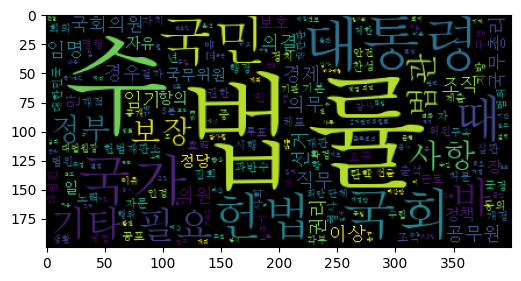

In [34]:
plt.figure(figsize=(6, 4))
plt.imshow(wc.generate_from_frequencies(dict(tags)))